In [0]:
#program on data augmentation using an an audio clip (right.wav)
#from tf speech recog train data.
import os
import librosa   #for audio processing
import IPython.display as ipd
import random
import sys
import io
import pandas as pd
import glob
import IPython
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
#Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.

In [2]:
#bed.
IPython.display.Audio("/content/drive/My Drive/trainf/right/0135f3f2_nohash_1.wav")

In [0]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

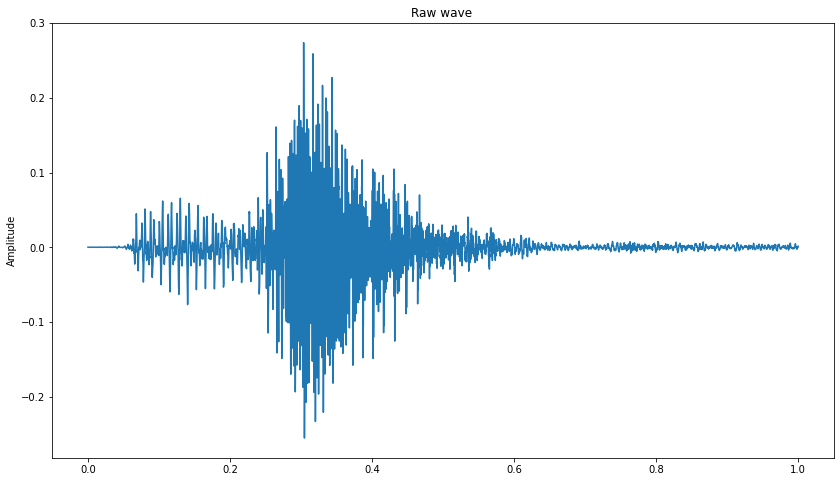

In [5]:
#graph
data = load_audio_file("/content/drive/My Drive/trainf/right/0135f3f2_nohash_1.wav")
plot_time_series(data)
ipd.Audio(data, rate=16000)

In [0]:
#function to plot spectrogram
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

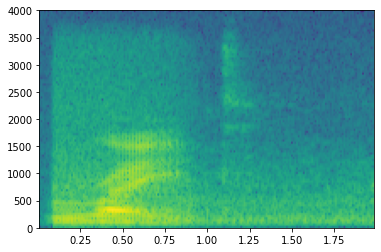

In [8]:
#spectrogram
x = graph_spectrogram("/content/drive/My Drive/trainf/right/0135f3f2_nohash_1.wav")

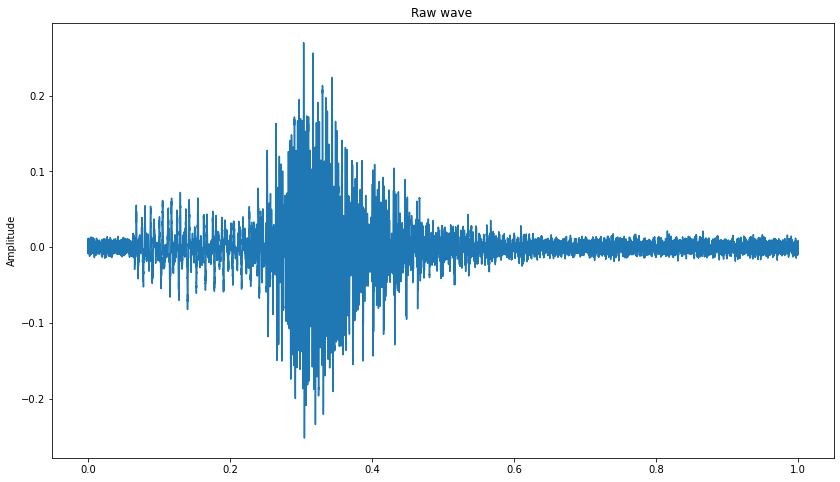

In [9]:
# Adding disturbance
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
ipd.Audio(data_wn, rate=16000)

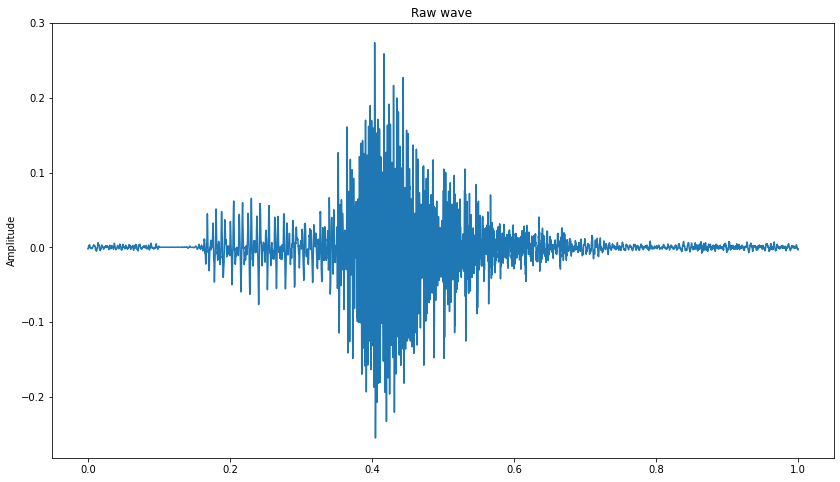

In [10]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear 'off' 


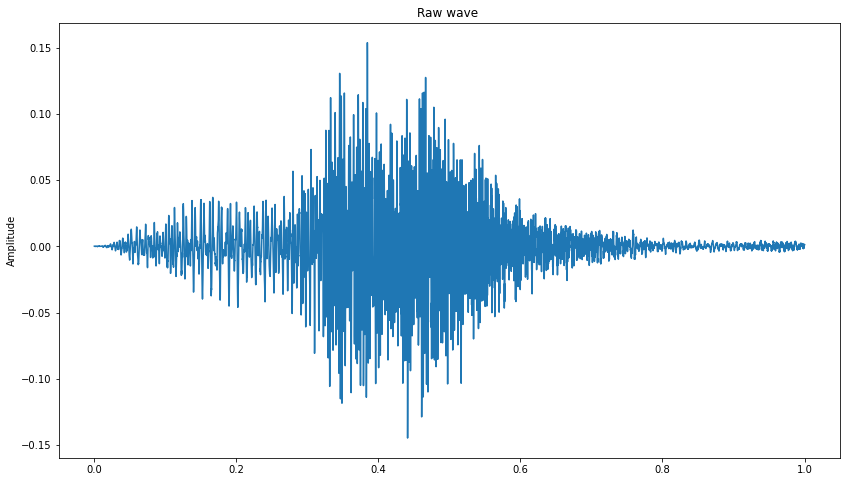

Higher frequencies  


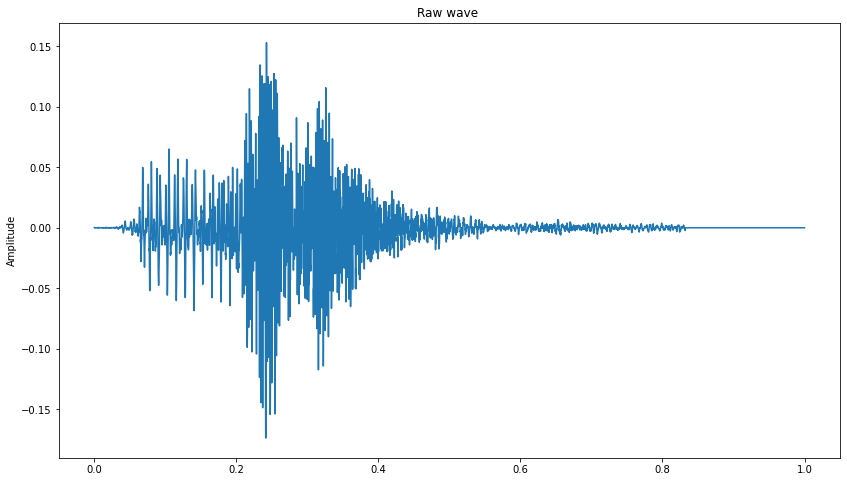

In [11]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear 'off' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

In [14]:
from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/trainf"]).decode("utf8"))

go
left
no
off
on
right
stop
yes



In [16]:
_, data = wavfile.read("/content/drive/My Drive/trainf/right/012c8314_nohash_1.wav")
print("Time steps in audio recording before spectrogram", data[:,0].shape)
print("Time steps in input after spectrogram", x.shape)

IndexError: ignored